In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This information for Data is Confidential so I not shared original details.

db_host ='00.000.00.000'
username = 'example_1'
user_pass = '##########'
db_name = 'project_telecom'

In [ ]:
connection=create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
connection.table_names()


In [7]:
query='select * from telecom_churn_data'
data=pd.read_sql(query,connection)

In [8]:
data.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
data.columns=['State','Account_Length','Area_code','Phone','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_calls','Day_charge','Eve_Mins','Eve_calls','Eve_charge','Night_Mins','Night_calls','Night_charge','International_Mins','International_calls','International_charge','CustomerServ_Calls','Churn']

In [10]:
data.head(100)

,State,Account_Length,Area_code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_Mins,Night_calls,Night_charge,International_Mins,International_calls,International_charge,CustomerServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [11]:
data.shape

(4617, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account_Length          4617 non-null object
Area_code               4617 non-null object
Phone                   4617 non-null object
International_Plan      4617 non-null object
VMail_Plan              4617 non-null object
VMail_Message           4617 non-null object
Day_Mins                4617 non-null object
Day_calls               4617 non-null object
Day_charge              4617 non-null object
Eve_Mins                4617 non-null object
Eve_calls               4617 non-null object
Eve_charge              4617 non-null object
Night_Mins              4617 non-null object
Night_calls             4617 non-null object
Night_charge            4617 non-null object
International_Mins      4617 non-null object
International_calls     4617 non-null object
International_charge    4617 non-null object
CustomerServ_Calls      4617 non-null 

In [13]:
data.describe()

,State,Account_Length,Area_code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_Mins,Night_calls,Night_charge,International_Mins,International_calls,International_charge,CustomerServ_Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,411-5334,no,no,0,189.3,102,26.18,...,105,14.25,186.2,105,9.66,11.1,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [14]:
data.isnull().sum()

State                   0
Account_Length          0
Area_code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_calls               0
Day_charge              0
Eve_Mins                0
Eve_calls               0
Eve_charge              0
Night_Mins              0
Night_calls             0
Night_charge            0
International_Mins      0
International_calls     0
International_charge    0
CustomerServ_Calls      0
Churn                   0
dtype: int64

In [15]:
data2=data.copy()

In [16]:
data2.drop_duplicates(['Phone']).shape   # Why It's Display all The Rows????

(4617, 21)

# Apply Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.International_Plan=label_encoder.fit_transform(data.International_Plan)
data.VMail_Plan=label_encoder.fit_transform(data.VMail_Plan)
data.Churn=label_encoder.fit_transform(data.Churn)
data.State=label_encoder.fit_transform(data.State)
data.Phone=label_encoder.fit_transform(data.Phone)

In [18]:
data.head()

,State,Account_Length,Area_code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_Mins,Night_calls,Night_charge,International_Mins,International_calls,International_charge,CustomerServ_Calls,Churn
0,16,128,415,2637,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,35,107,415,2132,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,31,137,415,1509,0,0,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2326,1,0,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,150,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:
data.corr()

,State,Phone,International_Plan,VMail_Plan,Churn
State,1.000000,0.014826,0.009789,-0.033323,0.010979
Phone,0.014826,1.000000,0.015810,0.017446,0.008819
International_Plan,0.009789,0.015810,1.000000,0.009278,0.257524
VMail_Plan,-0.033323,0.017446,0.009278,1.000000,-0.110149
Churn,0.010979,0.008819,0.257524,-0.110149,1.000000


# Find the Churn Rate for our Data

In [20]:
data_churn=data.loc[data.Churn==1]

In [21]:
data_churn.shape  # 656 members Migrates to other telecom Company

(656, 21)

In [22]:
656/4617  # It's Gives the Churn Rate , 656 is who churn and 4617 is total customer at starting  
          # so churn rate in percentage is 14.20 % is so much high 
          # normal Churn rate is 3-6 % (it's ok for any company)

0.14208360407190818

In [23]:
data_churn

,State,Account_Length,Area_code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_Mins,Night_calls,Night_charge,International_Mins,International_calls,International_charge,CustomerServ_Calls,Churn
10,15,65,415,99,0,0,0,129.1,137,21.95,...,83,19.42,208.8,111,9.4,12.7,6,3.43,4,1
15,34,161,415,1180,0,0,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,5,77,408,3199,0,0,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,3,12,408,1610,0,0,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,20,135,408,2695,1,1,41,173.1,85,29.43,...,107,17.33,122.2,78,5.5,14.6,15,3.94,0,1
48,13,119,415,3406,0,0,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,1
54,50,87,415,1272,0,0,0,151,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
57,5,121,408,2089,0,1,30,198.4,129,33.73,...,77,6.4,181.2,77,8.15,5.8,3,1.57,3,1
69,43,150,510,2267,0,0,0,178.9,101,30.41,...,110,14.37,148.6,100,6.69,13.8,3,3.73,4,1
76,7,82,415,2258,0,0,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,1


# Check Correlation between each Features

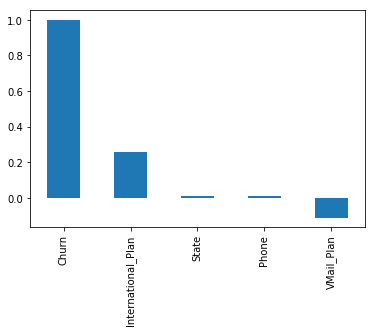

In [24]:
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# Divide Data in to Train and Test

In [25]:
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
x=data.iloc[:,:-1]
y=data.Churn

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Logistic Regression For All Features

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
prediction=logistic_model.predict(x_test)

In [30]:



from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
accuracy_score(y_test,prediction)

0.8593073593073594

In [32]:
confusion_matrix(y_test,prediction)

array([[775,  24],
       [106,  19]], dtype=int64)

In [33]:
recall_score(y_test,prediction)

0.152

# Random Forest For All features

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=10,
                                    max_features=5,
                                    n_estimators=15,
                                    max_depth=15,
                                    criterion='gini')
random_forest.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [35]:
random_forest_prediction=random_forest.predict(x_test)

In [36]:
accuracy_score(y_test,random_forest_prediction)

0.961038961038961

In [37]:
confusion_matrix(y_test,random_forest_prediction)

array([[794,   5],
       [ 31,  94]], dtype=int64)

In [38]:
recall_score(y_test,random_forest_prediction)

0.752

# SVM For All Features

In [39]:
from sklearn.svm import SVC
svm_model=SVC(random_state=10,
             C=20,
             gamma=0.01)
svm_model.fit(x_train,y_train)


SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
svm_prediction=svm_model.predict(x_test)

In [41]:
accuracy_score(y_test,svm_prediction)

0.8647186147186147

In [42]:
confusion_matrix(y_test,svm_prediction)

array([[799,   0],
       [125,   0]], dtype=int64)

In [43]:
recall_score(y_test,svm_prediction)

0.0

# Copy Data for different Task to play

In [44]:
data3=data.copy()

In [45]:
data3.head()

,State,Account_Length,Area_code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_Mins,Night_calls,Night_charge,International_Mins,International_calls,International_charge,CustomerServ_Calls,Churn
0,16,128,415,2637,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,35,107,415,2132,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,31,137,415,1509,0,0,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2326,1,0,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,150,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Drop some Columns
## Phone,Day-Eve-Night-International Calls ,Day-Eve-Night-International Mins

In [46]:
data3.drop(columns=['Phone','Day_calls','Eve_calls','Night_calls','International_calls','Day_Mins','Eve_Mins','Night_Mins','International_Mins'],inplace=True)

In [47]:
data3.head()

,State,Account_Length,Area_code,International_Plan,VMail_Plan,VMail_Message,Day_charge,Eve_charge,Night_charge,International_charge,CustomerServ_Calls,Churn
0,16,128,415,0,1,25,45.07,16.78,11.01,2.7,1,0
1,35,107,415,0,1,26,27.47,16.62,11.45,3.7,1,0
2,31,137,415,0,0,0,41.38,10.3,7.32,3.29,0,0
3,35,84,408,1,0,0,50.9,5.26,8.86,1.78,2,0
4,36,75,415,1,0,0,28.34,12.61,8.41,2.73,3,0


In [48]:
x2=data3.iloc[:,:-1]
y2=data3.Churn

In [49]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=10)

# Logistic Regression 

In [50]:
logistic_regression2=LogisticRegression()
logistic_regression2.fit(x2_train,y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logistic_prediction2=logistic_regression2.predict(x2_test)

In [52]:
accuracy_score(y2_test,logistic_prediction2)

0.8593073593073594

In [53]:
confusion_matrix(y2_test,logistic_prediction2)

array([[778,  21],
       [109,  16]], dtype=int64)

In [54]:
recall_score(y2_test,logistic_prediction2)

0.128

# Random Forest

In [55]:
random_forest2=RandomForestClassifier(random_state=10,
                                     max_depth=10,
                                     max_features=5,
                                     n_estimators=10)
random_forest2.fit(x2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [56]:
random_forest2_prediction=random_forest2.predict(x2_test)

In [57]:
accuracy_score(y2_test,random_forest2_prediction)

0.9415584415584416

In [58]:
confusion_matrix(y2_test,random_forest2_prediction)

array([[789,  10],
       [ 44,  81]], dtype=int64)

In [59]:
recall_score(y_test,random_forest2_prediction)

0.648

# SVM 

In [60]:
svm2=SVC(random_state=10,
        C=25,
        gamma=0.001)
svm2.fit(x2_train,y2_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
svm2_prediction=svm2.predict(x2_test)

In [62]:
accuracy_score(y2_test,svm2_prediction)

0.9015151515151515

In [63]:
recall_score(y_test,svm2_prediction)

0.4

# Naive Baye's

In [64]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

In [65]:
nber=BernoulliNB()
nmul=MultinomialNB()
ngau=GaussianNB()
nber.fit(x2_train,y2_train)
nmul.fit(x2_train,y2_train)
ngau.fit(x2_train,y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
predict_ber=nber.predict(x2_test)
predict_mul=nmul.predict(x2_test)
predict_gau=ngau.predict(x2_test)

In [67]:
accuracy_score(y2_test,predict_ber)

0.8376623376623377

In [68]:
accuracy_score(y2_test,predict_mul)

0.5043290043290043

In [69]:
accuracy_score(y2_test,predict_gau)

0.8409090909090909

In [70]:
recall_score(y2_test,predict_gau)

0.384

# We get nearly equal accuracy score after deleting some features so we can delete or drop this features.

# Find the Risk score for each customer

In [71]:
data4=pd.read_sql(query,connection)

In [72]:
data4.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [73]:
data4.columns=['State','Account_Length','Area_code','Phone','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_calls','Day_charge','Eve_Mins','Eve_calls','Eve_charge','Night_Mins','Night_calls','Night_charge','International_Mins','International_calls','International_charge','CustomerServ_Calls','Churn']

In [74]:
data4.drop(columns=['State','Account_Length','Area_code','VMail_Message','Day_Mins','Day_calls','Eve_Mins','Eve_calls','Night_Mins','Night_calls','International_Mins','International_calls'],inplace=True)

In [75]:
data4.head()

,Phone,International_Plan,VMail_Plan,Day_charge,Eve_charge,Night_charge,International_charge,CustomerServ_Calls,Churn
0,382-4657,no,yes,45.07,16.78,11.01,2.7,1,False.
1,371-7191,no,yes,27.47,16.62,11.45,3.7,1,False.
2,358-1921,no,no,41.38,10.3,7.32,3.29,0,False.
3,375-9999,yes,no,50.9,5.26,8.86,1.78,2,False.
4,330-6626,yes,no,28.34,12.61,8.41,2.73,3,False.


In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data4.International_Plan=le.fit_transform(data4.International_Plan)
data4.VMail_Plan=le.fit_transform(data4.VMail_Plan)
data4.Churn=le.fit_transform(data4.Churn)


In [77]:
data4.head()

,Phone,International_Plan,VMail_Plan,Day_charge,Eve_charge,Night_charge,International_charge,CustomerServ_Calls,Churn
0,382-4657,0,1,45.07,16.78,11.01,2.7,1,0
1,371-7191,0,1,27.47,16.62,11.45,3.7,1,0
2,358-1921,0,0,41.38,10.3,7.32,3.29,0,0
3,375-9999,1,0,50.9,5.26,8.86,1.78,2,0
4,330-6626,1,0,28.34,12.61,8.41,2.73,3,0


In [78]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 9 columns):
Phone                   4617 non-null object
International_Plan      4617 non-null int32
VMail_Plan              4617 non-null int32
Day_charge              4617 non-null object
Eve_charge              4617 non-null object
Night_charge            4617 non-null object
International_charge    4617 non-null object
CustomerServ_Calls      4617 non-null object
Churn                   4617 non-null int32
dtypes: int32(3), object(6)
memory usage: 270.6+ KB


In [79]:
data4.Day_charge=data4.Day_charge.astype('float')
data4.Eve_charge=data4.Eve_charge.astype('float')
data4.Night_charge=data4.Night_charge.astype('float')
data4.International_charge=data4.International_charge.astype('float')
data4.CustomerServ_Calls=data4.CustomerServ_Calls.astype('float')

In [80]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 9 columns):
Phone                   4617 non-null object
International_Plan      4617 non-null int32
VMail_Plan              4617 non-null int32
Day_charge              4617 non-null float64
Eve_charge              4617 non-null float64
Night_charge            4617 non-null float64
International_charge    4617 non-null float64
CustomerServ_Calls      4617 non-null float64
Churn                   4617 non-null int32
dtypes: float64(5), int32(3), object(1)
memory usage: 270.6+ KB


In [81]:
data4['Total_charge']=data4[['Day_charge','Eve_charge','Night_charge','International_charge']].sum(axis=1)

In [82]:
data4.head()

,Phone,International_Plan,VMail_Plan,Day_charge,Eve_charge,Night_charge,International_charge,CustomerServ_Calls,Churn,Total_charge
0,382-4657,0,1,45.07,16.78,11.01,2.70,1.0,0,75.56
1,371-7191,0,1,27.47,16.62,11.45,3.70,1.0,0,59.24
2,358-1921,0,0,41.38,10.30,7.32,3.29,0.0,0,62.29
3,375-9999,1,0,50.90,5.26,8.86,1.78,2.0,0,66.80
4,330-6626,1,0,28.34,12.61,8.41,2.73,3.0,0,52.09


In [83]:
data5=data4.loc[data.Churn==1].copy()

In [84]:
data4.drop(columns=['Day_charge','Eve_charge','Night_charge','International_charge'],inplace=True)

In [85]:
data4.head()

,Phone,International_Plan,VMail_Plan,CustomerServ_Calls,Churn,Total_charge
0,382-4657,0,1,1.0,0,75.56
1,371-7191,0,1,1.0,0,59.24
2,358-1921,0,0,0.0,0,62.29
3,375-9999,1,0,2.0,0,66.80
4,330-6626,1,0,3.0,0,52.09


In [86]:
data5.head()

,Phone,International_Plan,VMail_Plan,Day_charge,Eve_charge,Night_charge,International_charge,CustomerServ_Calls,Churn,Total_charge
10,329-6603,0,0,21.95,19.42,9.40,3.43,4.0,1,54.20
15,351-7269,0,0,56.59,27.01,7.23,1.46,4.0,1,92.29
21,393-7984,0,0,10.61,14.44,9.43,1.54,5.0,1,36.02
33,360-1596,0,0,42.43,21.45,12.61,3.19,1.0,1,79.68
41,383-6029,1,1,29.43,17.33,5.50,3.94,0.0,1,56.20


In [87]:
data5.drop(columns=['Day_charge','Eve_charge','Night_charge','International_charge'],inplace=True)

In [88]:
data5.head()

,Phone,International_Plan,VMail_Plan,CustomerServ_Calls,Churn,Total_charge
10,329-6603,0,0,4.0,1,54.20
15,351-7269,0,0,4.0,1,92.29
21,393-7984,0,0,5.0,1,36.02
33,360-1596,0,0,1.0,1,79.68
41,383-6029,1,1,0.0,1,56.20


In [89]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 10 to 4599
Data columns (total 6 columns):
Phone                 656 non-null object
International_Plan    656 non-null int32
VMail_Plan            656 non-null int32
CustomerServ_Calls    656 non-null float64
Churn                 656 non-null int32
Total_charge          656 non-null float64
dtypes: float64(2), int32(3), object(1)
memory usage: 28.2+ KB


In [90]:
data5.describe()

,International_Plan,VMail_Plan,CustomerServ_Calls,Churn,Total_charge
count,656.000000,656.000000,656.000000,656.0,656.000000
mean,0.283537,0.147866,2.239329,1.0,65.361021
std,0.451058,0.355238,1.822432,0.0,13.777865
min,0.000000,0.000000,0.000000,1.0,22.930000
25%,0.000000,0.000000,1.000000,1.0,53.557500
50%,0.000000,0.000000,2.000000,1.0,66.760000
75%,1.000000,0.000000,4.000000,1.0,76.747500
max,1.000000,1.000000,9.000000,1.0,96.150000


In [91]:
def churn_score(charge,calls):
    if (charge >= 85) | (calls >= 6) :
        return 'A'
    elif (charge >=70)  | (calls >= 3) :
        return 'B'
    elif (charge > 20) | (calls > 0):
        return 'C'
    else:
        return 'D'    
        

In [92]:
data5['Class']=churn_score(data5['Total_charge'],data5['CustomerServ_Calls'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [93]:
data5.head()

,Phone,International_Plan,VMail_Plan,CustomerServ_Calls,Churn,Total_charge
10,329-6603,0,0,4.0,1,54.20
15,351-7269,0,0,4.0,1,92.29
21,393-7984,0,0,5.0,1,36.02
33,360-1596,0,0,1.0,1,79.68
41,383-6029,1,1,0.0,1,56.20


In [94]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

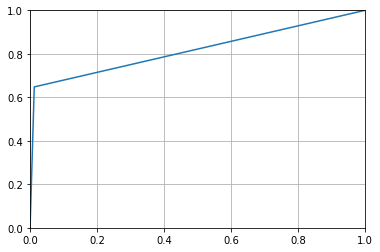

0.8177421777221526


In [95]:
tnr, tpr, thresholds = metrics.roc_curve(y2_test,random_forest2_prediction)
plt.plot(tnr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y2_test,random_forest2_prediction))